# Data Exploration Notebook

This notebook provides a comprehensive exploration of the datasets in this project, including:
- IOT sensor data
- Meteorological data 
- Electricity pricing data

The analysis will help us understand the structure, quality, and patterns in our data.

## 1. Import Required Libraries

Import essential libraries for data exploration including pandas, numpy, matplotlib, and seaborn.

In [3]:
# Import essential libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

# Set up plotting style
plt.style.use('default')
warnings.filterwarnings('ignore')

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Read Data

Load data from the CSV files in our project directory and display the first few rows of each dataset.

In [9]:
# Load the available datasets
try:
    # IOT sensor data
    iot_data = pd.read_csv('IOT_andmed_7.12.24-17.03.25.csv')
    print("✓ IOT data loaded successfully")
    print(f"Shape: {iot_data.shape}")
    
    # Meteorological data
    meteo_data = pd.read_csv('Meteo Physicum archive 071224-170325 - archive.csv')
    print("✓ Meteorological data loaded successfully")
    print(f"Shape: {meteo_data.shape}")
    
    # Electricity pricing data
    electricity_data = pd.read_csv('NP tunnihinnad    071224-170325.csv')
    print("✓ Electricity pricing data loaded successfully")
    print(f"Shape: {electricity_data.shape}")
    
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    print("Please ensure all CSV files are in the correct directory.")

✓ IOT data loaded successfully
Shape: (23036, 3)
✓ Meteorological data loaded successfully
Shape: (28658, 10)
✓ Electricity pricing data loaded successfully
Shape: (2401, 1)


### Filter out data from a specific date

The initial dataset contains a large amount of data from `2024-12-07`. We will remove all records from this date to focus on the rest of the dataset for this analysis.

In [11]:
# Print the shape of the dataframe before filtering
print(f"Shape of iot_data before filtering: {iot_data.shape}")

# Filter out rows where 'last_changed' starts with '2024-12-07'
iot_filtered = iot_data[iot_data['last_changed'].str.startswith('2024-12-07')]

# Print the shape of the dataframe after filtering
print(f"Shape of iot_data after filtering: {iot_filtered.shape}")

print(iot_filtered)

Shape of iot_data before filtering: (23036, 3)
Shape of iot_data after filtering: (175, 3)
                                       entity_id      state              last_changed
0          sensor.abshumidkuu2_absolute_humidity   8.988466  2024-12-07T06:00:00.000Z
1          sensor.abshumidkuu2_absolute_humidity   8.988987  2024-12-07T07:00:00.000Z
2          sensor.abshumidkuu2_absolute_humidity   9.006078  2024-12-07T08:00:00.000Z
3          sensor.abshumidkuu2_absolute_humidity   9.034537  2024-12-07T09:00:00.000Z
4          sensor.abshumidkuu2_absolute_humidity   9.015033  2024-12-07T10:00:00.000Z
...                                          ...        ...                       ...
20743  sensor.indoor_outdoor_meter_3866_humidity  52.304481  2024-12-07T19:00:00.000Z
20744  sensor.indoor_outdoor_meter_3866_humidity  51.202417  2024-12-07T20:00:00.000Z
20745  sensor.indoor_outdoor_meter_3866_humidity  51.511285  2024-12-07T21:00:00.000Z
20746  sensor.indoor_outdoor_meter_3866_humidity 

In [12]:
# Save the filtered data to a new CSV file
output_filename = 'iot_12_07.csv'
iot_filtered.to_csv(output_filename, index=False)

print(f"Filtered data saved to {output_filename}")

Filtered data saved to iot_12_07.csv


### From long table to smaller dataframes

In [20]:
# Filter data for a specific sensor
dt_ohk_soojus = iot_data[iot_data["entity_id"] == "sensor.ohksoojus_power"][['last_changed', 'state']]
dt_boiler_power = iot_data[iot_data["entity_id"] == "sensor.0xa4c138cdc6eff777_power"][['last_changed', 'state']]
dt_elutoa_niiskus_abs = iot_data[iot_data["entity_id"] == "sensor.abshumidkuu2_absolute_humidity"][['last_changed', 'state']]
dt_elutoa_niiskus_perc = iot_data[iot_data["entity_id"] == "sensor.tempniiskuslauaall_humidity"][['last_changed', 'state']]
dt_elutoa_temp = iot_data[iot_data["entity_id"] == "sensor.tempniiskuslauaall_temperature"][['last_changed', 'state']]
dt_vets_temp = iot_data[iot_data["entity_id"] == "sensor.indoor_outdoor_meter_3866"][['last_changed', 'state']]
dt_boiler_voltage = iot_data[iot_data["entity_id"] == "sensor.0xa4c138cdc6eff777_voltage"][['last_changed', 'state']]
#dt_outdoor_temp = ...
dt_air_purifier_2_5 = iot_data[iot_data["entity_id"] == "sensor.air_purifier_particulate_matter_2_5"][['last_changed', 'state']]
dt_air_purifier_10 = iot_data[iot_data["entity_id"] == "sensor.air_purifier_particulate_matter_10"][['last_changed', 'state']]

### From per-sensor dataframes to wide table

In [24]:
# Merge all sensor data into one big datatable using timestamp
# First, let's prepare each dataset by selecting only the needed columns and renaming the state column

# Prepare each sensor dataset
sensors_data = []

# Define sensor mappings (original dataframe, new column name)
sensor_mappings = [
    (dt_ohk_soojus, 'heat_pump_power'),
    (dt_boiler_power, 'boiler_power'),
    (dt_elutoa_niiskus_abs, 'living_room_hum_abs'),
    (dt_elutoa_niiskus_perc, 'living_room_hum_perc'),
    (dt_elutoa_temp, 'living_room_temp'),
    (dt_vets_temp, 'wc_temp'),
    (dt_boiler_voltage, 'boiler_voltage'),
    (dt_air_purifier_2_5, 'air_purifier_2_5'),
    (dt_air_purifier_10, 'air_purifier_10')
]

# Process each sensor data
for sensor_df, column_name in sensor_mappings:
    if not sensor_df.empty:
        # Select only timestamp and state columns, rename state column
        temp_df = sensor_df.copy()
        temp_df.rename(columns={'state': column_name, 'last_changed': 'timestamp'}, inplace=True)
        sensors_data.append(temp_df)
        print(f"✓ Processed {column_name}: {len(temp_df)} records")
    else:
        print(f"⚠ Warning: {column_name} is empty")

# Start with the first sensor data as base
if sensors_data:
    iot_data_wide = sensors_data[0]
    
    # Merge all other sensor data
    for i in range(1, len(sensors_data)):
        iot_data_wide = pd.merge(iot_data_wide, sensors_data[i], 
                               on='timestamp', how='outer')
        print(f"✓ Merged sensor {i+1}")
    
    print(f"\n✓ Combined dataset shape: {iot_data_wide.shape}")
    print(f"Date range: {iot_data_wide['timestamp'].min()} to {iot_data_wide['timestamp'].max()}")
    
    # Display first few rows
    print(iot_data_wide.head(3))
else:
    print("No sensor data to combine!")

✓ Processed heat_pump_power: 2174 records
✓ Processed boiler_power: 1897 records
✓ Processed living_room_hum_abs: 2404 records
✓ Processed living_room_hum_perc: 2404 records
✓ Processed living_room_temp: 2404 records
✓ Processed wc_temp: 2398 records
✓ Processed boiler_voltage: 2403 records
✓ Processed air_purifier_2_5: 2310 records
✓ Processed air_purifier_10: 2336 records
✓ Merged sensor 2
✓ Merged sensor 3
✓ Merged sensor 4
✓ Merged sensor 5
✓ Merged sensor 6
✓ Merged sensor 7
✓ Merged sensor 8
✓ Merged sensor 9

✓ Combined dataset shape: (2412, 10)
Date range: 2024-12-07T06:00:00.000Z to 2025-09-26T08:53:19.123Z
                  timestamp  heat_pump_power  boiler_power  living_room_hum_abs  living_room_hum_perc  living_room_temp    wc_temp  boiler_voltage  air_purifier_2_5  air_purifier_10
0  2024-12-07T06:00:00.000Z       885.436507      0.000000             8.988466             52.742843         19.765220  20.709891      233.478183          1.000000         2.000000
1  2024-12-0

## 3. Sensor Data Visualization

Now, let's visualize the combined sensor data over time to identify trends, patterns, and correlations. We will create separate plots for each group of related sensors.

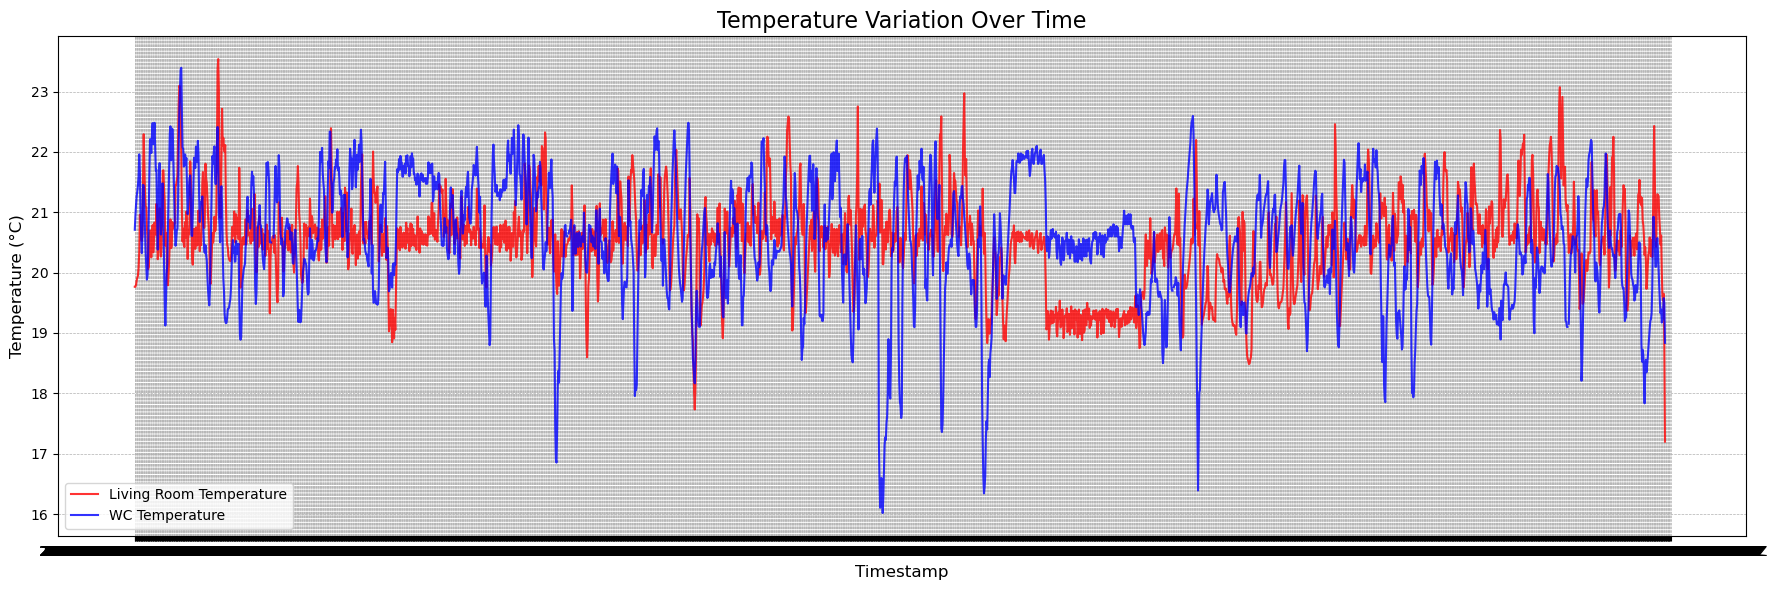

In [25]:
# --- 1. Temperature Visualization ---

plt.figure(figsize=(18, 6))
plt.plot(iot_data_wide['timestamp'], iot_data_wide['living_room_temp'], label='Living Room Temperature', color='red', alpha=0.8)
plt.plot(iot_data_wide['timestamp'], iot_data_wide['wc_temp'], label='WC Temperature', color='blue', alpha=0.8)

plt.title('Temperature Variation Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

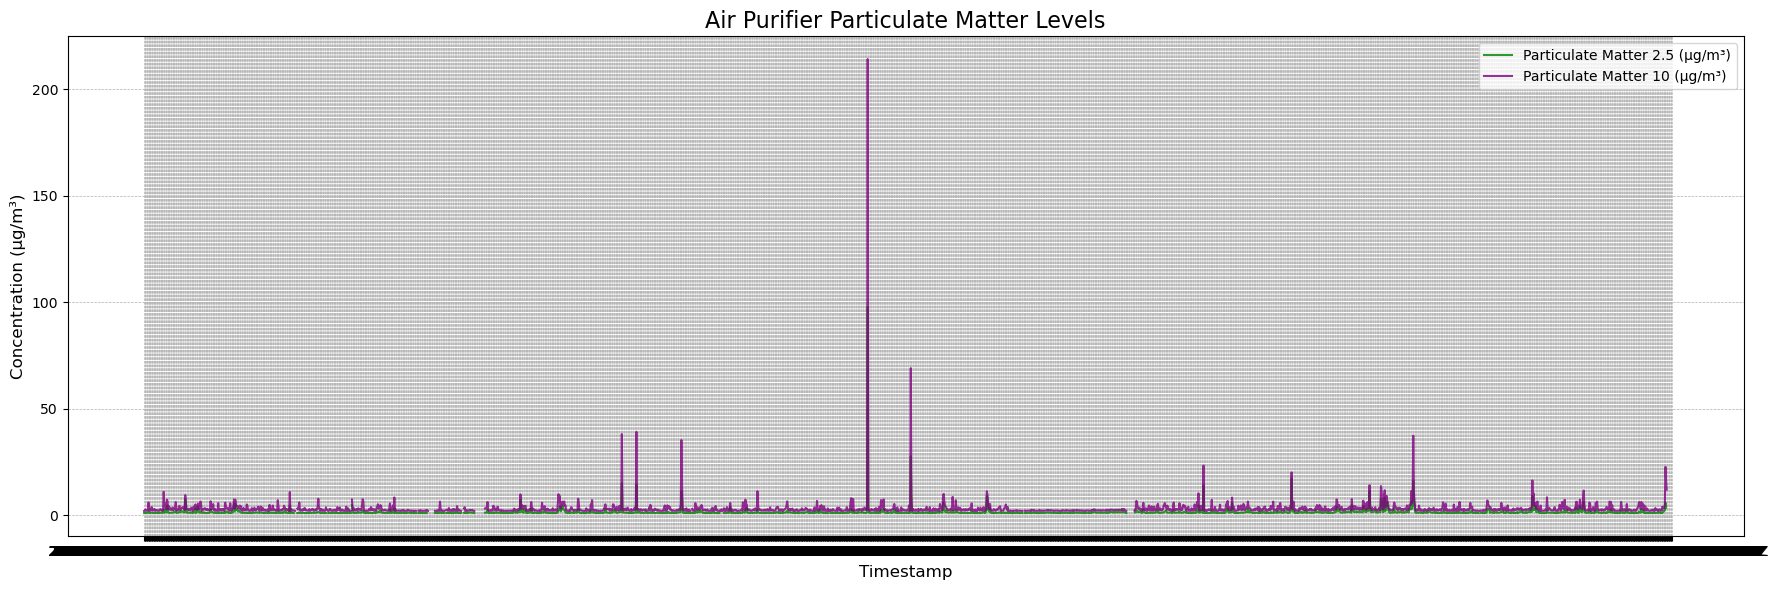

In [26]:
# --- 2. Air Purifier PM2.5 and PM10 Visualization ---

plt.figure(figsize=(18, 6))
plt.plot(iot_data_wide['timestamp'], iot_data_wide['air_purifier_2_5'], label='Particulate Matter 2.5 (µg/m³)', color='green', alpha=0.8)
plt.plot(iot_data_wide['timestamp'], iot_data_wide['air_purifier_10'], label='Particulate Matter 10 (µg/m³)', color='purple', alpha=0.8)

plt.title('Air Purifier Particulate Matter Levels', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Concentration (µg/m³)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

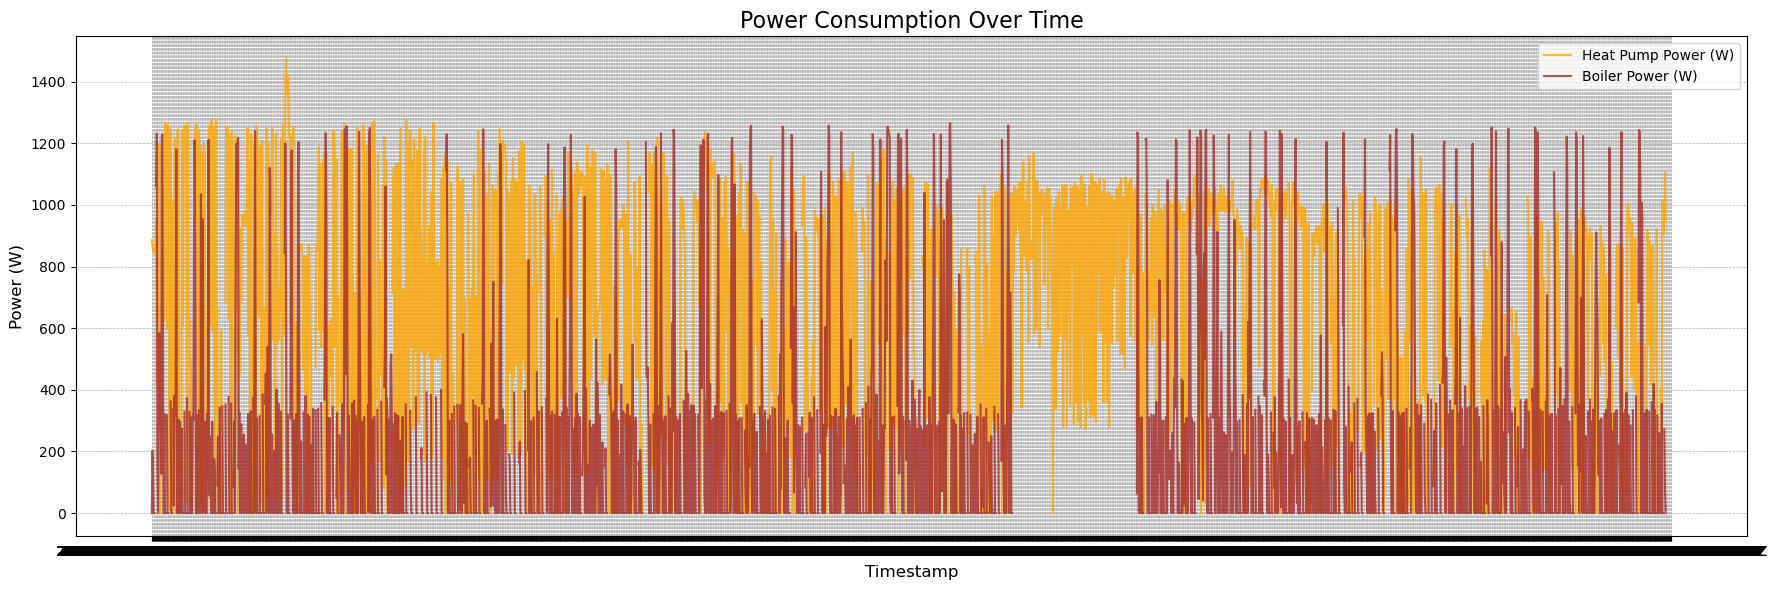

In [27]:
# --- 3. Power Consumption Visualization ---

plt.figure(figsize=(18, 6))
plt.plot(iot_data_wide['timestamp'], iot_data_wide['heat_pump_power'], label='Heat Pump Power (W)', color='orange', alpha=0.8)
plt.plot(iot_data_wide['timestamp'], iot_data_wide['boiler_power'], label='Boiler Power (W)', color='brown', alpha=0.8)

plt.title('Power Consumption Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Power (W)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

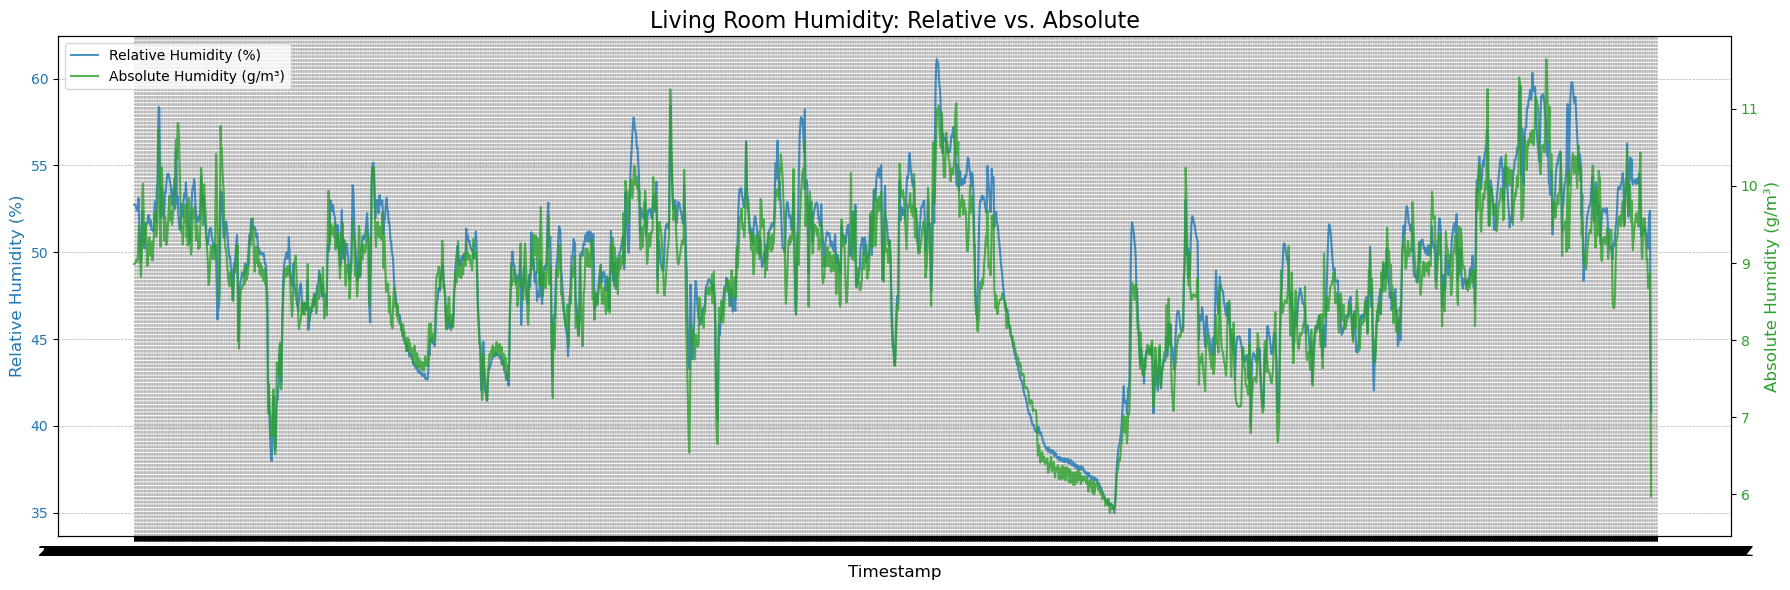

In [1]:
# --- 4. Humidity Visualization (Percentage and Absolute) ---

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot Percentage Humidity on the primary y-axis (left)
color = 'tab:blue'
ax1.set_xlabel('Timestamp', fontsize=12)
ax1.set_ylabel('Relative Humidity (%)', color=color, fontsize=12)
ax1.plot(iot_data_wide['timestamp'], iot_data_wide['living_room_hum_perc'], color=color, label='Relative Humidity (%)', alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis for Absolute Humidity
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Absolute Humidity (g/m³)', color=color, fontsize=12)
ax2.plot(iot_data_wide['timestamp'], iot_data_wide['living_room_hum_abs'], color=color, label='Absolute Humidity (g/m³)', alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Living Room Humidity: Relative vs. Absolute', fontsize=16)

# Add legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.show()

RuntimeError: Required dataframe 'iot_data' is not defined in the notebook environment